## Description:
    
- Trends of both the scatter and bar charts demonstrate that for day 09/13/18 most of the news have totally negative. The exception of this, is BBC of course which is normally very professional in terms of standing with hope.

- Another fact in scatters data is that the trend of each channel is linear in one point yet there is a drop (probably a very negative news) between the last 20 tweets.

- It is also possible to compare and see that which media is more negative (CNN) and which one is more positive (BBC).

In [1]:
%matplotlib inline
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from datetime import datetime

from config import (consumer_key, consumer_secret, access_token, access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
news_ids = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@newyorktimes110")

results_list = []

for news in news_ids:
    
    oldest_tweet = None
    
    counter = 1
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_times = []
    
    public_tweets = api.search(news, count=100, result_type="recent", max_id=oldest_tweet, lang="en")
    
    tweets = public_tweets["statuses"]
    
    for tweet in tweets:
           
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        oldest_tweet = tweet["id"] - 1
        
        sentiment = {
            "User": news,
            "Text": tweet["text"],
            "Date": tweet["created_at"],
            "Compound": np.mean(compound_list).round(3),
            "Positive": np.mean(positive_list).round(3),
            "Neutral": np.mean(negative_list).round(3),
            "Negative": np.mean(neutral_list).round(3),
            "Tweets Ago": counter
        }

        counter += 1
        
        print(sentiment)
        print()

        results_list.append(sentiment)

{'User': '@BBCWorld', 'Text': "RT @Griffith_Uni: #GriffithUni's Prof @SusanneBecken will join panel session for @BBCWorld “Technology and Demand: Where to Now?” at Pacifi…", 'Date': 'Fri Sep 14 01:36:38 +0000 2018', 'Compound': 0.178, 'Positive': 0.106, 'Neutral': 0.072, 'Negative': 0.821, 'Tweets Ago': 1}

{'User': '@BBCWorld', 'Text': "#Brazil meeting votes to protect world's whale population\n@Quad_Finn 🐳\n@BBCWorld \nhttps://t.co/33xEbhWzqg", 'Date': 'Fri Sep 14 01:36:29 +0000 2018', 'Compound': 0.28, 'Positive': 0.156, 'Neutral': 0.036, 'Negative': 0.808, 'Tweets Ago': 2}

{'User': '@BBCWorld', 'Text': "RT @BBCWorld: #HurricaneFlorence: Prisons in hurricane's path not evacuated https://t.co/hkyOXclR84", 'Date': 'Fri Sep 14 01:36:06 +0000 2018', 'Compound': 0.187, 'Positive': 0.104, 'Neutral': 0.024, 'Negative': 0.872, 'Tweets Ago': 3}

{'User': '@BBCWorld', 'Text': 'Why would Africans not invade their countries for greener pastures? they started it and they were damn Illegals… htt

{'User': '@BBCWorld', 'Text': '@RezaMoradi @BBCWorld I hope a heart to not to pick what wrong someone did after burying them. There is lot of positivity in him.', 'Date': 'Fri Sep 14 01:07:42 +0000 2018', 'Compound': 0.09, 'Positive': 0.101, 'Neutral': 0.067, 'Negative': 0.832, 'Tweets Ago': 73}

{'User': '@BBCWorld', 'Text': '@BBCWorld You think this is only Baltimore...  LMFAO!!! THEY BE ALL CROOKED!!! https://t.co/8QtybAiXEd', 'Date': 'Fri Sep 14 01:07:38 +0000 2018', 'Compound': 0.099, 'Positive': 0.103, 'Neutral': 0.067, 'Negative': 0.83, 'Tweets Ago': 74}

{'User': '@BBCWorld', 'Text': "The Crystal Method - Feat Filter - Can't You Trip Like I Do https://t.co/NVewknCz1h via @YouTube @BBCWorld… https://t.co/t4LSVS0BG8", 'Date': 'Fri Sep 14 01:07:26 +0000 2018', 'Compound': 0.094, 'Positive': 0.102, 'Neutral': 0.067, 'Negative': 0.831, 'Tweets Ago': 75}

{'User': '@BBCWorld', 'Text': "RT @BBCWorld: Amnesty condemns Ontario's use of obscure clause https://t.co/Lmp1KeDskp", 'Date': 'F

{'User': '@CBSNews', 'Text': 'RT @lyndie2227: @MassStatePolice This story needs more coverage. Wth is going on? @CBSNews @NBCNews @FoxNews @cnnbrk', 'Date': 'Fri Sep 14 01:28:07 +0000 2018', 'Compound': -0.104, 'Positive': 0.075, 'Neutral': 0.097, 'Negative': 0.828, 'Tweets Ago': 83}

{'User': '@CBSNews', 'Text': '@taintofartistry @lyndie2227 @MassStatePolice @CBSNews @NBCNews @FoxNews @cnnbrk @CNN To be fair, @CBS affiliate th… https://t.co/RdVkiBWNsM', 'Date': 'Fri Sep 14 01:27:58 +0000 2018', 'Compound': -0.099, 'Positive': 0.076, 'Neutral': 0.096, 'Negative': 0.828, 'Tweets Ago': 84}

{'User': '@CBSNews', 'Text': 'RT @CBSNews: TWO ANGELS: This little girl singing her cat to sleep and feeding him like a baby will melt your heart. https://t.co/c2157n39w…', 'Date': 'Fri Sep 14 01:27:51 +0000 2018', 'Compound': -0.094, 'Positive': 0.076, 'Neutral': 0.094, 'Negative': 0.829, 'Tweets Ago': 85}

{'User': '@CBSNews', 'Text': 'RT @CBSNews: On Thursday, President Trump denied that 3,000 peop

{'User': '@CNN', 'Text': 'RT @CNN: Cooper: Trump disrespected Puerto Rico\'s dead, "and he disrespected the living who will live the rest of their lives with the pain…', 'Date': 'Fri Sep 14 01:37:18 +0000 2018', 'Compound': -0.18, 'Positive': 0.056, 'Neutral': 0.134, 'Negative': 0.81, 'Tweets Ago': 72}

{'User': '@CNN', 'Text': 'RT @Mariavrgus: @CNN Last week the number was 64. Weird. Surprised at how gullible people are', 'Date': 'Fri Sep 14 01:37:17 +0000 2018', 'Compound': -0.181, 'Positive': 0.058, 'Neutral': 0.135, 'Negative': 0.807, 'Tweets Ago': 73}

{'User': '@CNN', 'Text': "RT @VABVOX: There is a veritable news blackout on the MA explosions.\n@CNN is 100% #Florence (not that it's not a major story) and @maddow i…", 'Date': 'Fri Sep 14 01:37:17 +0000 2018', 'Compound': -0.179, 'Positive': 0.057, 'Neutral': 0.133, 'Negative': 0.81, 'Tweets Ago': 74}

{'User': '@CNN', 'Text': 'RT @CNN: "I’m disgusted. It\'s so disgusting, because that’s my mom.” \n\nCarmen Cruz, whose mother died

{'User': '@FoxNews', 'Text': '@FoxNews @BarackObama Executive order 12473 https://t.co/skJl5u8f1x', 'Date': 'Fri Sep 14 01:38:09 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 0.0, 'Negative': 1.0, 'Tweets Ago': 1}

{'User': '@FoxNews', 'Text': "RT @EdKrassen: That lawyer has a name.  It's @MichaelAvenatti and he didn't turn down @FoxNews.  @SeanHannity turned him down.  Get ready f…", 'Date': 'Fri Sep 14 01:38:09 +0000 2018', 'Compound': 0.181, 'Positive': 0.056, 'Neutral': 0.0, 'Negative': 0.944, 'Tweets Ago': 2}

{'User': '@FoxNews', 'Text': 'RT @TuckerCarlson: My new book #ShipOfFools is available for preorder! Click the link below to be one of the first to read. @FoxNews  https…', 'Date': 'Fri Sep 14 01:38:08 +0000 2018', 'Compound': 0.12, 'Positive': 0.037, 'Neutral': 0.0, 'Negative': 0.963, 'Tweets Ago': 3}

{'User': '@FoxNews', 'Text': '@TuckerCarlson And Tucker...\nYou REALLY didn’t know that Michael Cohen pleaded guilty to campaign finance violation… https://t.co/y

{'User': '@FoxNews', 'Text': "RT @FoxNews: 'You're Exploiting Her and You Know It': Carlson Battles Avenatti LIVE on Set https://t.co/vd8U97Ug7L", 'Date': 'Fri Sep 14 01:37:46 +0000 2018', 'Compound': -0.094, 'Positive': 0.077, 'Neutral': 0.111, 'Negative': 0.812, 'Tweets Ago': 75}

{'User': '@FoxNews', 'Text': 'Wait? What? Is @FoxNews saying @realDonaldTrump is wrong? I do believe Hell has officially frozen over!!! #Trump https://t.co/RGVCtVMuft', 'Date': 'Fri Sep 14 01:37:46 +0000 2018', 'Compound': -0.105, 'Positive': 0.076, 'Neutral': 0.114, 'Negative': 0.81, 'Tweets Ago': 76}

{'User': '@FoxNews', 'Text': "RT @LottieBluChat: #thefive I'm SO SICK OF JUAN! I keep screaming SHUT UP whenever he talks...which is ALL the time now! He's taking over!!…", 'Date': 'Fri Sep 14 01:37:46 +0000 2018', 'Compound': -0.115, 'Positive': 0.075, 'Neutral': 0.117, 'Negative': 0.809, 'Tweets Ago': 77}

{'User': '@FoxNews', 'Text': '@FoxNews Another self-inflicted problem for DJT. He needs to take respo

{'User': '@newyorktimes110', 'Text': 'WP headline" Novelist who wrote about \' How to Murder Your Husband \' charged with murdering her husband". This ques… https://t.co/kY8wYWoiT0', 'Date': 'Wed Sep 12 21:02:45 +0000 2018', 'Compound': -0.044, 'Positive': 0.061, 'Neutral': 0.079, 'Negative': 0.86, 'Tweets Ago': 41}

{'User': '@newyorktimes110', 'Text': '@Patrici15767099 @DineshDSouza We will learn all the truth when @realDonaldTrump declassifies all FBI and CIA files… https://t.co/YdcMd1ZN3B', 'Date': 'Wed Sep 12 20:32:11 +0000 2018', 'Compound': -0.036, 'Positive': 0.062, 'Neutral': 0.077, 'Negative': 0.861, 'Tweets Ago': 42}

{'User': '@newyorktimes110', 'Text': '@DonaldJTrumpJr @DineshDSouza Follow the money! @ABC @CBS @NBCNews @washingtonpost @HuffPost @newyorktimes110… https://t.co/NxHc7QEy4f', 'Date': 'Wed Sep 12 20:28:16 +0000 2018', 'Compound': -0.035, 'Positive': 0.061, 'Neutral': 0.075, 'Negative': 0.864, 'Tweets Ago': 43}

{'User': '@newyorktimes110', 'Text': 'If yesterday 

In [3]:
# news_df = pd.DataFrame(results_list).set_index("User").round(3)
news_df = pd.DataFrame(results_list).round(3)

news_df.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,0.178,Fri Sep 14 01:36:38 +0000 2018,0.821,0.072,0.106,RT @Griffith_Uni: #GriffithUni's Prof @Susanne...,1,@BBCWorld
1,0.280,Fri Sep 14 01:36:29 +0000 2018,0.808,0.036,0.156,#Brazil meeting votes to protect world's whale...,2,@BBCWorld
2,0.187,Fri Sep 14 01:36:06 +0000 2018,0.872,0.024,0.104,RT @BBCWorld: #HurricaneFlorence: Prisons in h...,3,@BBCWorld
3,0.039,Fri Sep 14 01:35:11 +0000 2018,0.871,0.050,0.078,Why would Africans not invade their countries ...,4,@BBCWorld
4,0.161,Fri Sep 14 01:35:03 +0000 2018,0.839,0.055,0.106,"RT @BBCWorld: When a shop worker collapsed, in...",5,@BBCWorld


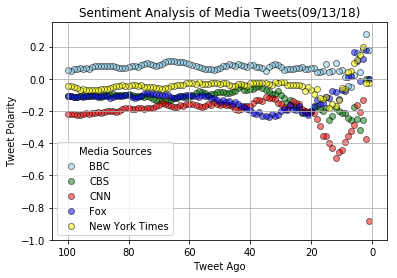

In [11]:
bbc = news_df[news_df["User"] == "@BBCWorld"]
cbs = news_df[news_df["User"] == "@CBSNews"]
cnn = news_df[news_df["User"] == "@CNN"]
fox = news_df[news_df["User"] == "@FoxNews"]
nyt = news_df[news_df["User"] == "@newyorktimes110"]

plt.scatter(bbc["Tweets Ago"], bbc["Compound"], color="skyblue", edgecolor="black", label="BBC", alpha=0.5)
plt.scatter(cbs["Tweets Ago"], cbs["Compound"], color="g", edgecolor="black", label="CBS", alpha=0.5)
plt.scatter(cnn["Tweets Ago"], cnn["Compound"], color="r", edgecolor="black", label="CNN", alpha=0.5)
plt.scatter(fox["Tweets Ago"], fox["Compound"], color="b", edgecolor="black", label="Fox", alpha=0.5)
plt.scatter(nyt["Tweets Ago"], nyt["Compound"], color="yellow", edgecolor="black", label="New York Times", alpha=0.5)

plt.grid()
plt.xlim(105, -5)
plt.ylim(-1.0, 0.35)

lgnd = plt.legend(title="Media Sources", loc="best")


now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Media Tweets({now})")
plt.xlabel("Tweet Ago")
plt.ylabel("Tweet Polarity")

plt.savefig("Images/SHN_output.png")
plt.show()

In [25]:
bar_df = {"BBC": np.mean(bbc["Compound"]),
          "CBS": np.mean(cbs["Compound"]),
          "CNN": np.mean(cnn["Compound"]),
          "Fox": np.mean(fox["Compound"]),
          "NYT": np.mean(nyt["Compound"])
         }

bar_series = pd.Series(bar_df)

bar_series

BBC    0.07554
CBS   -0.12396
CNN   -0.21061
Fox   -0.11968
NYT   -0.04232
dtype: float64

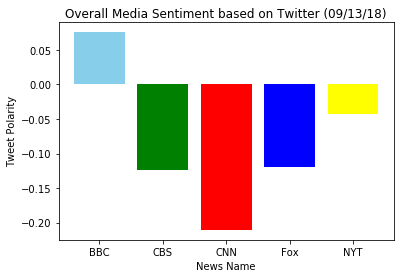

In [42]:
plt.bar(range(len(bar_series.index)), bar_series.values, color=['skyblue', 'g', 'r', 'b', 'yellow'])
plt.xticks(range(len(bar_series.index)), bar_series.index)

plt.ylabel("Tweet Polarity")
plt.xlabel("News Name")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")
plt.show()